[이론1](https://bab2min.tistory.com/554)  
[이론2](https://danbi-ncsoft.github.io/works/2018/11/12/network_analysis-1.html)  
[이론3](https://danbi-ncsoft.github.io/works/2018/11/12/network_analysis-2.html)  
[이론4](https://brunch.co.kr/@gimmesilver/25)

[Networkx-python](http://pythonkr.github.io/pyconkr-2014/pdf/pyconkr-2014-07_networkx.pdf)  
  
[응용1](http://jonathansoma.com/lede/algorithms-2017/classes/networks/networkx-graphs-from-source-target-dataframe/)  
[응용2](https://towardsdatascience.com/catching-that-flight-visualizing-social-network-with-networkx-and-basemap-ce4a0d2eaea6)   
 
[적용1-plotly](https://plot.ly/python/network-graphs/)  
[적용2-hvpolt](https://hvplot.pyviz.org/user_guide/NetworkX.html)  


In [124]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [11]:
# 한글 사용 아래 경로는 한글 폰트 경로
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2MJRE.ttf").get_name()
rc('font', family=font_name)
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

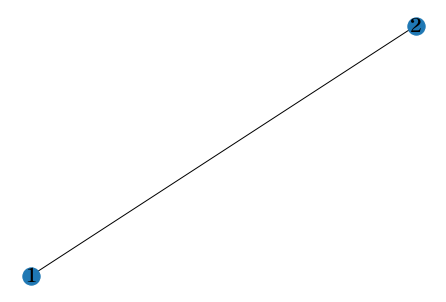

In [17]:
G = nx.Graph()
G.add_edge(1, 2) # 엣지 추가
nx.draw(G,with_labels=True, font_family=font_name, font_size=20)
plt.show()

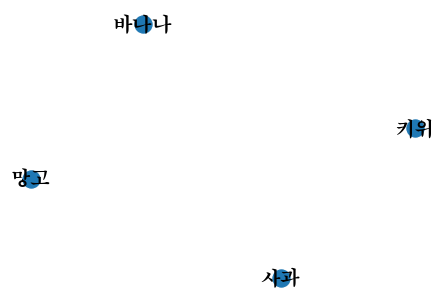

In [19]:
G = nx.Graph()
G.add_node('사과') # 노드 정의
fruits = ['바나나', '키위', '망고']
G.add_nodes_from(fruits)
nx.draw(G,with_labels=True, font_family=font_name, font_size=20)
plt.show()

In [21]:
G.nodes()

NodeView(('사과', '망고', '키위', '바나나'))

In [25]:
# 생성된 노드에 엣지를 부여하는 방법
G = nx.Graph()
G.add_edge('사과', '바나나') # node 간에 관계 지정
f_relations = [('사과', '키위'), ('사과', '망고')]
G.add_edges_from(f_relations) # 다중 edges 간에 관계지정
G.edges() # 설정된 관계확인

EdgeView([('사과', '망고'), ('사과', '키위'), ('사과', '바나나')])

In [27]:
G.node['키위']# 속성에 대해 확인해보기, 초기에는 아무런 속성이 없다.

{}

In [28]:
G.node['키위']['종류'] = '과일'
G.node['키위']

{'종류': '과일'}

In [29]:
G.nodes(data=True) # 설정된 관계, 속성 확인

NodeDataView({'사과': {}, '망고': {}, '키위': {'종류': '과일'}, '바나나': {}})

In [33]:
# 노드생성과 함께 속성 부여
G.add_node('키위', 종류='과일')
fruits = ['바나나', '사과']
G.add_nodes_from(fruits, 종류='과일')

In [34]:
G.node['바나나']

{'종류': '과일'}

In [35]:
# 엣지에 속성 부여하기
G.edges()

EdgeView([('사과', '망고'), ('사과', '키위'), ('사과', '바나나')])

In [37]:
G.edges(data=True) #현재 설정된 엣지 속성은 없다.

EdgeDataView([('사과', '망고', {}), ('사과', '키위', {}), ('사과', '바나나', {})])

In [42]:
G.add_edge('사과', '망고', weight=2.5) # 가중치 부여하기
f_relations = [('사과', '키위'), ('사과', '망고')]
G.add_edges_from(f_relations, color='blue') #색에대한 엣지 속성 부여
G['사과']['망고']['weight'] = 5 # 초기에는 2.5로 부여 되었으나 5로 변환, 각각 부여하기
# G.edge['사과']['키위']['weight'] = 2 # 적용불가능 
G['사과']['키위']['weight'] = 2

In [46]:
G.edges(data=True) # 현재까지 부여된 엣지 속성확인하기

EdgeDataView([('사과', '망고', {'color': 'blue', 'weight': 5}), ('사과', '키위', {'color': 'blue', 'weight': 2}), ('사과', '바나나', {})])

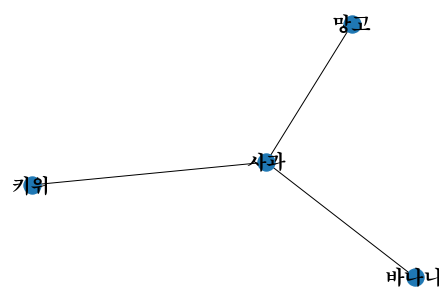

In [49]:
G = nx.Graph()
f_relations = [('사과', '키위'), ('사과', '망고'), ('바나나', '사과')]
G.add_edges_from(f_relations)
nx.draw(G,with_labels=True, font_family=font_name, font_size=20)
plt.show()

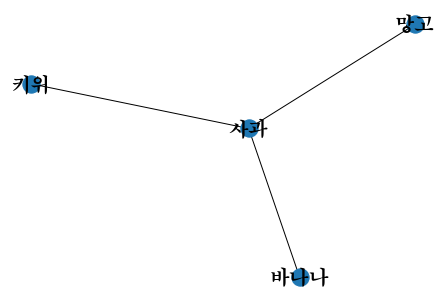

In [50]:
nx.draw(G,with_labels=True, font_family=font_name, font_size=20) # 기본그리기

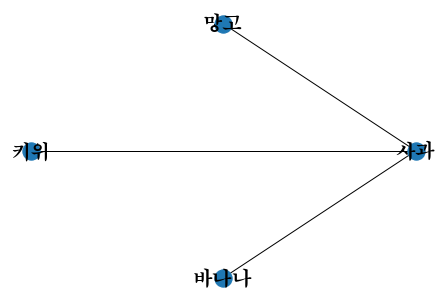

In [52]:
nx.draw_circular(G,with_labels=True, font_family=font_name, font_size=20) # 원 위에 노드 놓기

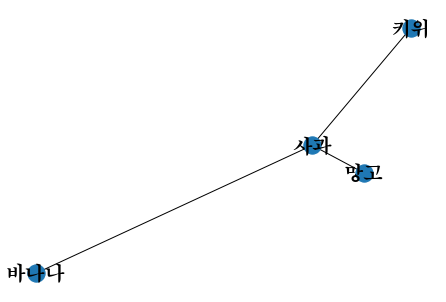

In [55]:
nx.draw_random(G,with_labels=True, font_family=font_name, font_size=20) # 균등 분포를 이용한 랜덤

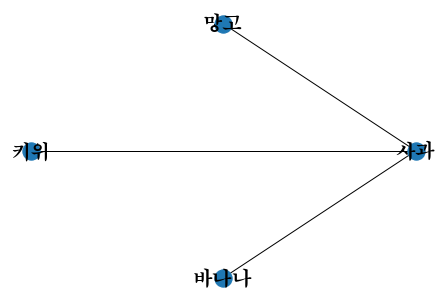

In [64]:
nx.draw_shell(G,with_labels=True, font_family=font_name, font_size=20) # 동심원 위에 노드 놓기

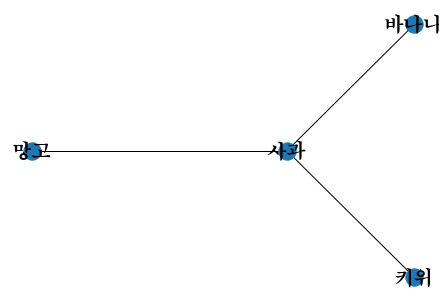

In [66]:
nx.draw_spectral(G,with_labels=True, font_family=font_name, font_size=20) # 그래프 라플라시안의 고유 벡터 기반

In [69]:
# 점의 위치를 지정하여 그림 그리기
pos = nx.spectral_layout(G)
print(pos)

{'사과': array([7.70288036e-17, 0.00000000e+00]), '망고': array([-1.,  0.]), '키위': array([ 0.5      , -0.8660254]), '바나나': array([0.5      , 0.8660254])}


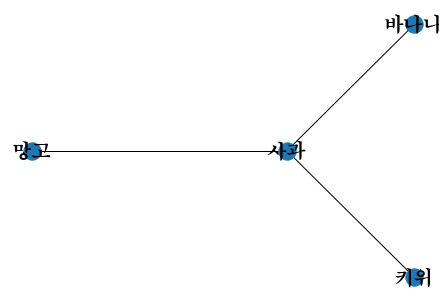

In [81]:
# 위치가 지정되면 항상 같은 위치에 그린다.
nx.draw(G, pos, with_labels=True, font_family=font_name, font_size=20)

In [92]:
# 각 점의 특징을 계산
G.nodes()

NodeView(('사과', '망고', '키위', '바나나'))

## Degree 계산

$$
\begin{bmatrix} 
0 & 1 & 1 & 1\\
1 & 0 & 0 & 0\\
1 & 0 & 0 & 0\\
1 & 0 & 0 & 0\\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
3 \\
1 \\
1 \\
1 \\
\end{bmatrix}
$$

In [96]:
# Degree 계산
print(G.degree())

[('사과', 3), ('망고', 1), ('키위', 1), ('바나나', 1)]


In [ ]:
nx.draw_spectral(G,with_labels=True, font_family=font_name, font_size=20)

dict_values([3, 1, 1, 1])

[('사과', 3), ('망고', 1), ('키위', 1), ('바나나', 1)]


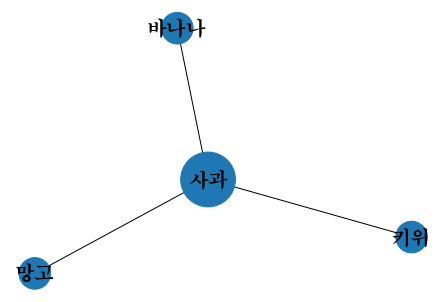

In [108]:
# Degree에 따른 노드의 크기에 적용, Degree에 가중치값으로도 사용가능 할 듯
fruits_relations = [('키위','사과'), ('망고','사과'), ('사과', '바나나')]
G.add_edges_from(fruits_relations)
degree = nx.degree(G)
print(degree)
nx.draw(G, with_labels=True, font_family=font_name, font_size=20, node_size=[n*1000 for n in dict(degree).values()])
plt.show()

함수 nx.draw() 에 대한 링크 https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx

### Degree Rank 그리기

In [110]:
G = nx.gnp_random_graph(100,0.02) # binomial_graph 생성

In [112]:
degree_sequence=sorted(dict(nx.degree(G)).values(),reverse=True) # Degree 리스트 값 생성
dmax=max(degree_sequence)

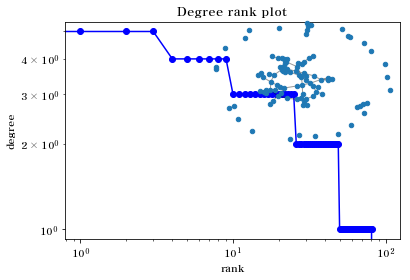

In [118]:
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")


# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
pos=nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G,pos,node_size=20)
nx.draw_networkx_edges(G,pos,alpha=0.4)

### Degree 분포 생성

In [126]:
# G = nx.gnp_random_graph(100,0.02) # binomial_graph 생성
# degrees = dict(nx.degree(G)).values()
# dmax=max(degrees)

# h, bins = np.histogram(degrees, bins=dmax)
# hmax = max(h)
# plt.axis([1, dmax, 1, hmax])
# x=bins.compress(h)
# y=h.compress(h)

# plt.loglog(x,y, 'bo-')
# plt.title("Degree distribution")
# plt.xlabel("degree")
# plt.ylabel("number of nodes")
# plt.savefig("degree_distribution.png")
# plt.show()

In [133]:
data_set = [('치킨', '무'), ('무', '기름'), ('콜라', '치킨'), ('치킨', '맥주'), ('맥주', '소주'), ('기름', '콜라'), ('소주', '치킨')]

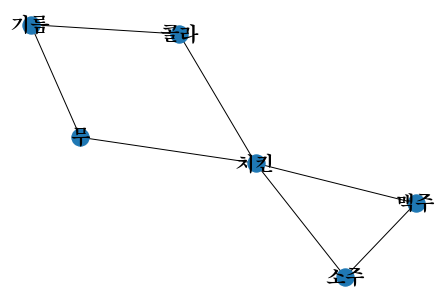

In [134]:
G = nx.Graph()
G.add_edges_from(data_set)
nx.draw(G,with_labels=True, font_family=font_name, font_size=20)
plt.show()

In [135]:
# 거리값 생성
A = nx.to_numpy_matrix(G)

In [136]:
print(A)

[[0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]]


In [139]:
print(A*A)

[[2. 1. 0. 1. 1. 1.]
 [1. 4. 2. 0. 1. 0.]
 [0. 2. 2. 0. 0. 0.]
 [1. 0. 0. 2. 1. 2.]
 [1. 1. 0. 1. 2. 1.]
 [1. 0. 0. 2. 1. 2.]]


In [137]:
print(A**2)

[[2. 1. 0. 1. 1. 1.]
 [1. 4. 2. 0. 1. 0.]
 [0. 2. 2. 0. 0. 0.]
 [1. 0. 0. 2. 1. 2.]
 [1. 1. 0. 1. 2. 1.]
 [1. 0. 0. 2. 1. 2.]]
